In [21]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

sns.set()

# Part A

Weights: [-0.5 -0.5]
Bias: 3.5


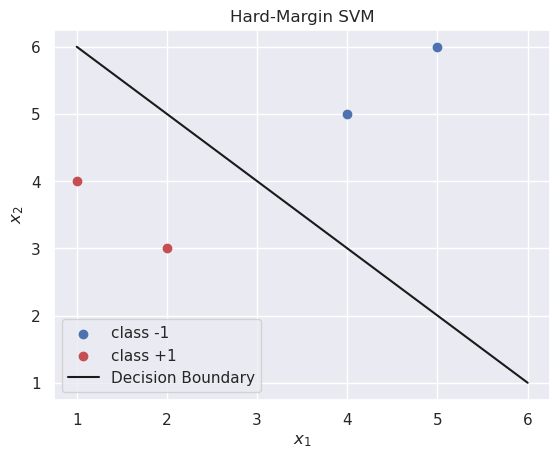

In [20]:
X = np.array([[1, 4], [2, 3], [4, 5], [5, 6]])
y = np.array([1, 1, -1, -1])


clf = SVC(kernel='linear')
clf.fit(X, y)

weights = clf.coef_[0]
a = -weights[0] / weights[1]
bias = clf.intercept_[0]

xx = np.linspace(X.min(), X.max())
yy = a * xx - clf.intercept_[0] / weights[1]

plt.scatter(X[y == -1, 0], X[y == -1 ,1], c='b', label="class -1")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', label="class +1")

plt.plot(xx, yy, 'k-', label='Decision Boundary')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Hard-Margin SVM')
plt.legend()

print(f"Weights: {weights}")
print(f"Bias: {bias:.1f}")

plt.savefig("../assets/Q4_partA.png")
plt.show()

# Part B

In [161]:
def plot_samples(X, y, title,color=['r', 'b'], labels=["-", "+"]):
    uniqe_y = np.unique(y)
    for i in range(len(uniqe_y)):
        label = uniqe_y[i]
        plt.scatter(X[y == label, 0], X[y == label ,1], c=color[i], label="class " + labels[i])
        
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.legend()
    plt.title(title)
    plt.tight_layout()

In [151]:
class MAP:
    def abs(X, alpha):
        return np.abs(X - np.array([alpha, 0]))
    
    def norm(X, center):
        return np.column_stack([np.linalg.norm(X - center, axis=1), np.full(len(X), 0)])

## Dataset 1

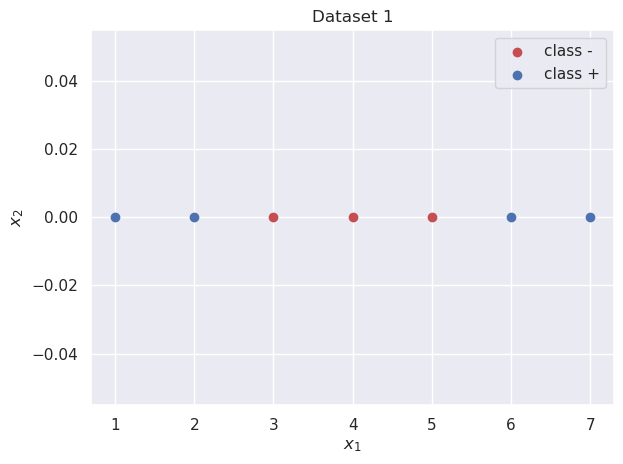

In [166]:
X = np.array([[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0]])
y = np.array([1, 1, -1, -1, -1, 1, 1])

plot_samples(X, y, "Dataset 1")
plt.savefig("../assets/Q4_data1.png")
plt.show()

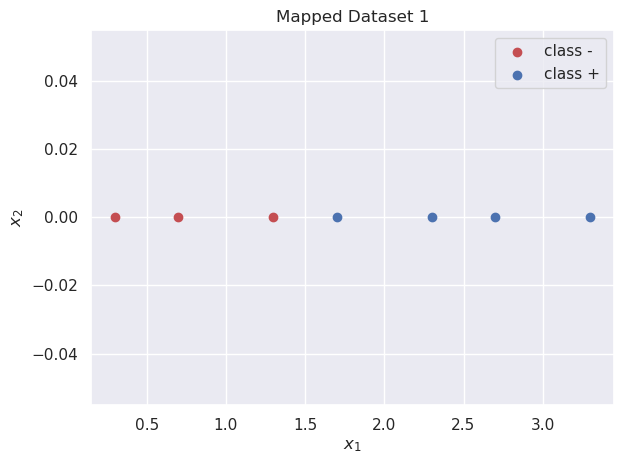

In [167]:
X_map = MAP.abs(X, 3.7)

plot_samples(X_map, y, "Mapped Dataset 1")
plt.savefig("../assets/Q4_map1.png")
plt.show()

## Dataset 2

In [168]:
def create_circle_samples(n, radius=1.0):
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)

    samples = np.column_stack((x, y))
    
    return samples

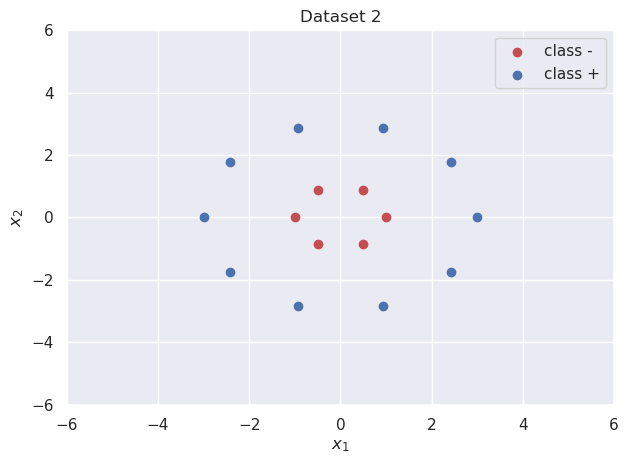

In [170]:
X = np.concatenate([create_circle_samples(10, 3), create_circle_samples(6, 1)])
y = np.concatenate([np.full(10, 1), np.full(6, -1)])

plot_samples(X, y, "Dataset 2")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.savefig("../assets/Q4_data2.png")
plt.show()

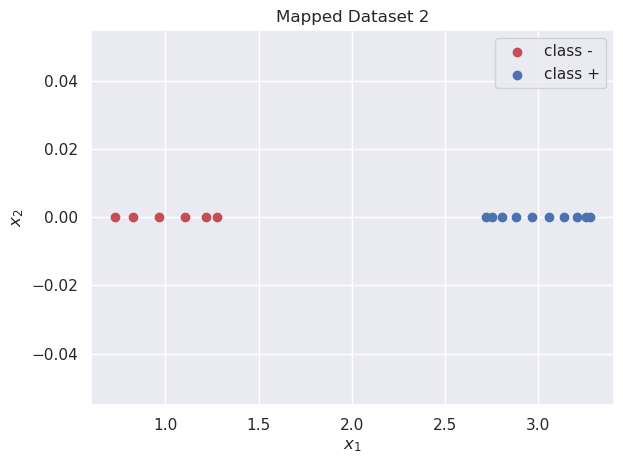

In [171]:
X_map = MAP.norm(X, [0.2, 0.2])

plot_samples(X_map, y, "Mapped Dataset 2")
plt.savefig("../assets/Q4_map2.png")
plt.show()

## Dataset 3

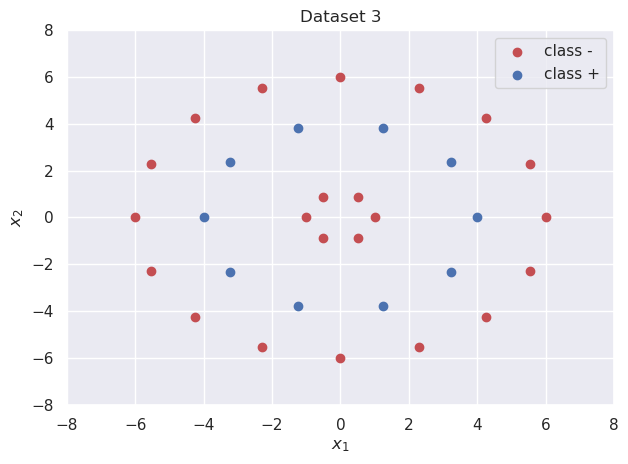

In [172]:
X = np.concatenate([create_circle_samples(10, 4), create_circle_samples(16, 6), create_circle_samples(6, 1)])
y = np.concatenate([np.full(10, 1), np.full(22, -1)])

plot_samples(X, y, "Dataset 3")
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.savefig("../assets/Q4_data3.png")
plt.show()

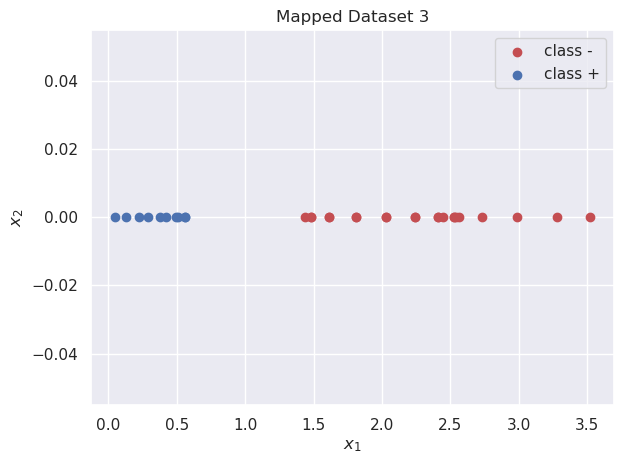

In [173]:
X_map = MAP.abs(MAP.norm(X, [0.4, 0.4]), 4)

plot_samples(X_map, y, "Mapped Dataset 3")
plt.savefig("../assets/Q4_map3.png")
plt.show()